## Apply FRM method for each uers

- **Frequency:** How many times users return to your site
- **Recency:** The length of time (in days) since a  visitor last came to the site
- **Monetary:** How much the user spends in total

In [88]:
import pandas as pd
import numpy as np
from datetime import timedelta

In [89]:
import matplotlib
import matplotlib.pyplot as plt

In [90]:
data = pd.read_csv("../data/data1.csv", parse_dates=["event_time", 'date'])
del data["Unnamed: 0"]

In [91]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,days,date
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,0,2019-10-01
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,0,2019-10-01
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,0,2019-10-01
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,0,2019-10-01
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,0,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...
20688237,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,151,2020-02-29
20688238,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,151,2020-02-29
20688239,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,151,2020-02-29
20688240,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,151,2020-02-29


In [92]:
data.nunique()

event_time       8782133
event_type             4
product_id         54570
category_id          525
category_code         12
brand                273
price               2855
user_id          1639151
user_session     4535941
days                 152
date                 152
dtype: int64

In [93]:
# Keep only purchsed event type
data_purchase =data[data["event_type"] == "purchase"]

In [94]:
#group by user_id and star_days
data_gb = data_purchase.groupby(['user_id', 'date']).agg({
    'user_session':'count',
    'event_type':'count', 
    'product_id':'count', 
    'category_id':'count', 
    'brand':'count', 
    'price':'sum'})

#reset index
data_gb.reset_index(inplace=True)

#change to date type
data_gb["date"] = data_gb["date"].astype("datetime64")

# rename column
data_gb = data_gb.rename(columns = {'user_session':'count_user_session', 
                                'event_type':'count_event_type', 
                                'product_id':'count_product_id', 
                                'category_id':'count_category_id', 
                                'brand':'count_brand', 
                                'price':'revenue'})

data_gb.head()

,user_id,date,count_user_session,count_event_type,count_product_id,count_category_id,count_brand,revenue
0,9794320,2019-11-25,4,4,4,4,4,12.68
1,10079204,2019-11-06,2,2,2,2,2,25.81
2,10280338,2019-11-20,10,10,10,10,5,25.26
3,10280338,2019-11-21,6,6,6,6,6,29.57
4,10280338,2020-01-12,1,1,1,1,1,18.10


In [95]:
# Create snapshot date
snapshot_date = data['date'].max() + timedelta(days=1)

print(snapshot_date)

2020-03-01 00:00:00


In [96]:
# Group by user_id
data_RFM_raw = data_gb.groupby(["user_id"]).agg({
    "date": lambda x:(snapshot_date - x.max()).days,
    "count_user_session": "sum",
    "revenue": "sum"})

# Rename
data_RFM_raw = data_RFM_raw.rename(columns = {"date": "Recency",
                          "count_user_session": "Frequency",
                          "revenue": "Monetary"})

# Reset Index
data_RFM_raw.reset_index(inplace=True)

In [97]:
data_RFM_raw

,user_id,Recency,Frequency,Monetary
0,9794320,97,4,12.68
1,10079204,116,2,25.81
2,10280338,11,86,177.83
3,12055855,72,4,16.54
4,12936739,44,2,29.89
...,...,...,...,...
110513,622065819,1,4,20.48
110514,622066161,1,4,12.95
110515,622067983,1,10,66.48
110516,622069477,1,1,0.95


## Checking Outliers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


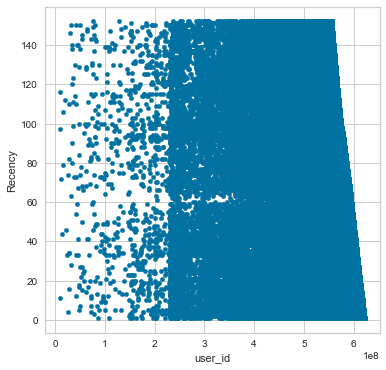

In [98]:
data_RFM_raw.plot.scatter(x='user_id', y='Recency')
fig_a = plt.gcf()
fig_a.set_size_inches(6, 6)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


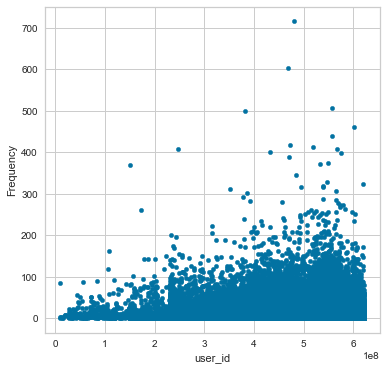

In [99]:
data_RFM_raw.plot.scatter(x='user_id', y='Frequency')
fig_b = plt.gcf()
fig_b.set_size_inches(6, 6)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


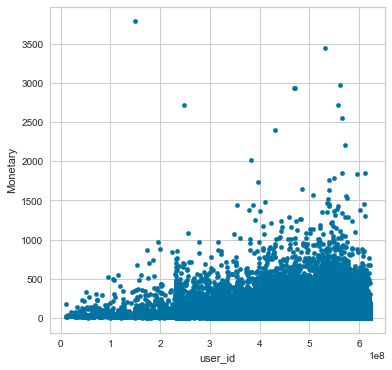

In [100]:
data_RFM_raw.plot.scatter(x='user_id', y='Monetary')
fig_b = plt.gcf()
fig_b.set_size_inches(6, 6)
plt.show()

### Removing Top 1% record for analysis (as they might skew the analysis)

In [35]:
#Creating Individual tables of RFM after removing top 1%
recency_cleaned = data_RFM_raw[data_RFM_raw['Recency'] < data_RFM_raw['Recency'].quantile(0.99)]
frequency_cleaned = data_RFM_raw[data_RFM_raw['Frequency'] < data_RFM_raw['Frequency'].quantile(0.99)]
monetary_cleaned = data_RFM_raw[data_RFM_raw['Monetary'] < data_RFM_raw['Monetary'].quantile(0.99)]


#Merging three dataframes to create rfm table
data_RFM = pd.merge(pd.merge(recency_cleaned[['user_id','Recency','Frequency','Monetary']], frequency_cleaned[['user_id']],on='user_id'), monetary_cleaned[['user_id']],on='user_id')


### Scale the Data

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
data_RFM_scaled = pd.DataFrame(data_RFM["user_id"])

data_RFM_scaled[['Recency', 'Frequency', "Monetary"]] = scaler.fit_transform(data_RFM[['Recency', 'Frequency', "Monetary"]])

data_RFM_scaled = data_RFM_scaled.set_index(["user_id"])

data_RFM_scaled

,Recency,Frequency,Monetary
user_id,,,
9794320,0.644295,0.034884,0.030254
10079204,0.771812,0.011628,0.061906
10280338,0.067114,0.988372,0.428379
12055855,0.476510,0.034884,0.039559
12936739,0.288591,0.011628,0.071742
...,...,...,...
622065819,0.000000,0.034884,0.049057
622066161,0.000000,0.034884,0.030905
622067983,0.000000,0.104651,0.159949


# Elbow Method for Choosing K
Choose K = 4

In [38]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  

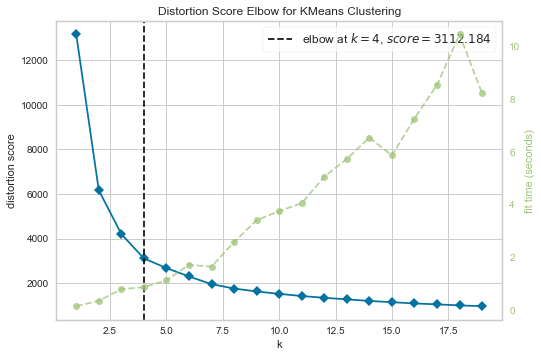

In [39]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(data_RFM_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Split Data with (2:8)

In [40]:
# Split data
index = np.random.rand(len(data_RFM_scaled)) < 0.8
X_train = data_RFM_scaled[index]
X_test = data_RFM_scaled[~index]

## Apply K-Means on X_train

In [41]:
kmeans = KMeans(n_clusters = 4, n_jobs = -1, verbose = 10)
y_pred = kmeans.fit_predict(X_train)
y_train = y_pred

Cluster X_test:

In [42]:
y_test = kmeans.predict(X_test)

## Valisuation K-Means

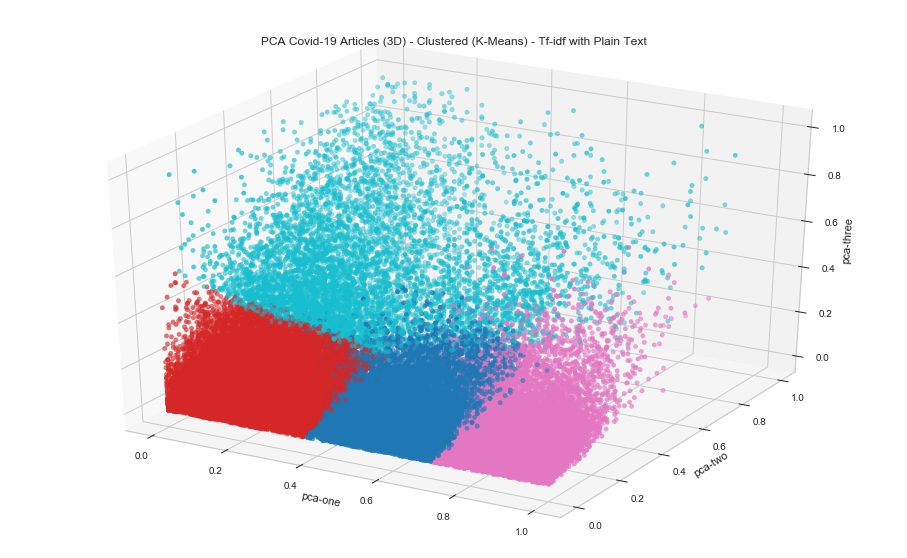

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16, 10)).gca(projection = '3d')
ax.scatter(
    xs = X_train["Recency"],
    ys = X_train["Frequency"],
    zs = X_train["Monetary"],
    c = y_train, 
    cmap = 'tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title("PCA Covid-19 Articles (3D) - Clustered (K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/pca_covid19_label_TFID_3d.png")
plt.show()

## Cross Validation on X_train

In [44]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# random forest classifier instance
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# cross validation on the training set 
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=5, n_jobs=-1)

# print out the mean of the cross validation scores
print("Avg_Accuracy for 5-fold cross validation: ", '{:,.3f}'.format(float(forest_scores.mean()) * 100), "%")

Avg_Accuracy for 5-fold cross validation:  99.728 %


## Helper Function

In [45]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='micro')) * 100), "%")
    print("Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='micro')) * 100), "%")
    print("F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='micro')) * 100), "%")

## Predict X_test

In [46]:
# first train the model
forest_clf.fit(X_train, y_train)

# make predictions on the test set
forest_pred = forest_clf.predict(X_test)

In [47]:
# print out the classification report
classification_report("Random Forest Classifier Report (Test Set)", y_test, forest_pred)

Random Forest Classifier Report (Test Set) :

Accuracy Score:  99.771 %
Precision:  99.771 %
Recall:  99.771 %
F1 score:  99.771 %


## Apply K-Means on Full Dataset

In [48]:
kmeans = KMeans(n_clusters = 4, n_jobs = -1, verbose = 10)
data_pred = kmeans.fit_predict(data_RFM_scaled)

Labels for the test set:

Now that we have the labels, let's plot the t-SNE. scatterplot again and see if we have any obvious clusters:

In [68]:
data_pred

array([2, 1, 3, ..., 0, 0, 0], dtype=int32)

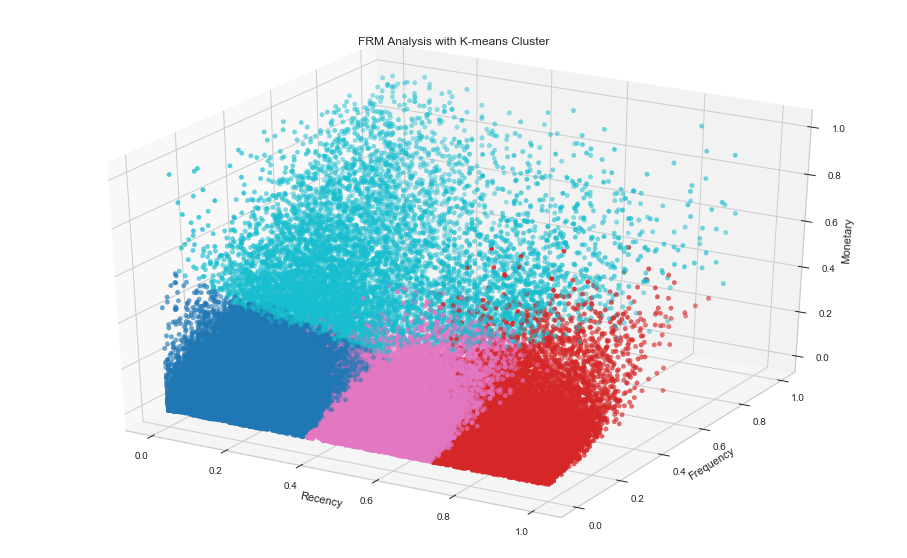

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax_full = plt.figure(figsize=(16, 10)).gca(projection = '3d')
ax_full.scatter(
    xs = data_RFM_scaled["Recency"],
    ys = data_RFM_scaled["Frequency"],
    zs = data_RFM_scaled["Monetary"],
    c = data_pred, 
    cmap = 'tab10'
)
ax_full.set_xlabel('Recency')
ax_full.set_ylabel('Frequency')
ax_full.set_zlabel('Monetary')
plt.title("FRM Analysis with K-means Cluster")
plt.show()

In [50]:
plt.savefig("../plots/FRM Analysis with K-means Cluster.png")

<Figure size 432x288 with 0 Axes>

In [51]:
data_RFM_scaled

,Recency,Frequency,Monetary
user_id,,,
9794320,0.644295,0.034884,0.030254
10079204,0.771812,0.011628,0.061906
10280338,0.067114,0.988372,0.428379
12055855,0.476510,0.034884,0.039559
12936739,0.288591,0.011628,0.071742
...,...,...,...
622065819,0.000000,0.034884,0.049057
622066161,0.000000,0.034884,0.030905
622067983,0.000000,0.104651,0.159949


In [52]:
data_RFM_scaled.reset_index(inplace=True)

In [53]:
# Create a dataframe for label
data_RFM_label = pd.DataFrame(data_pred, columns = ["labels"])

data_RFM_scaled_final = pd.concat([data_RFM_scaled, data_RFM_label], axis = 1)

data_RFM_scaled_final

,user_id,Recency,Frequency,Monetary,labels
0,9794320,0.644295,0.034884,0.030254,2
1,10079204,0.771812,0.011628,0.061906,1
2,10280338,0.067114,0.988372,0.428379,3
3,12055855,0.476510,0.034884,0.039559,2
4,12936739,0.288591,0.011628,0.071742,0
...,...,...,...,...,...
107684,622065819,0.000000,0.034884,0.049057,0
107685,622066161,0.000000,0.034884,0.030905,0
107686,622067983,0.000000,0.104651,0.159949,0
107687,622069477,0.000000,0.000000,0.001977,0


In [55]:
data_RFM_scaled_final.to_csv("../data/data_RFM_scaled_label.csv")

In [56]:
data_RFM = data_RFM.reset_index(inplace=True)

In [57]:
data_RFM_final = pd.concat([data_RFM, data_RFM_label], axis = 1)

data_RFM_final

,labels
0,2
1,1
2,3
3,2
4,0
...,...
107684,0
107685,0
107686,0
107687,0


In [59]:
data_RFM_scaled_final

,user_id,Recency,Frequency,Monetary,labels
0,9794320,0.644295,0.034884,0.030254,2
1,10079204,0.771812,0.011628,0.061906,1
2,10280338,0.067114,0.988372,0.428379,3
3,12055855,0.476510,0.034884,0.039559,2
4,12936739,0.288591,0.011628,0.071742,0
...,...,...,...,...,...
107684,622065819,0.000000,0.034884,0.049057,0
107685,622066161,0.000000,0.034884,0.030905,0
107686,622067983,0.000000,0.104651,0.159949,0
107687,622069477,0.000000,0.000000,0.001977,0


In [60]:
data_RFM_scaled_final["labels"].replace({0: "At-Risk", 1: "New Customers", 2: "Loyal Customers", 3: "Potential Loyalist"}, inplace=True)
data_RFM_scaled_final

In [61]:
data_RFM_scaled_final

,user_id,Recency,Frequency,Monetary,labels
0,9794320,0.644295,0.034884,0.030254,Loyal Customers
1,10079204,0.771812,0.011628,0.061906,New Customers
2,10280338,0.067114,0.988372,0.428379,Potential Loyalist
3,12055855,0.476510,0.034884,0.039559,Loyal Customers
4,12936739,0.288591,0.011628,0.071742,At-Risk
...,...,...,...,...,...
107684,622065819,0.000000,0.034884,0.049057,At-Risk
107685,622066161,0.000000,0.034884,0.030905,At-Risk
107686,622067983,0.000000,0.104651,0.159949,At-Risk
107687,622069477,0.000000,0.000000,0.001977,At-Risk


In [62]:
data_RFM_raw

,user_id,Recency,Frequency,Monetary
0,9794320,97,4,12.68
1,10079204,116,2,25.81
2,10280338,11,86,177.83
3,12055855,72,4,16.54
4,12936739,44,2,29.89
...,...,...,...,...
110513,622065819,1,4,20.48
110514,622066161,1,4,12.95
110515,622067983,1,10,66.48
110516,622069477,1,1,0.95


In [63]:
RFM = pd.merge(data_RFM_raw[['user_id','Recency','Frequency','Monetary']], data_RFM_scaled_final[['user_id', "labels"]],on='user_id')

In [64]:
RFM

,user_id,Recency,Frequency,Monetary,labels
0,9794320,97,4,12.68,Loyal Customers
1,10079204,116,2,25.81,New Customers
2,10280338,11,86,177.83,Potential Loyalist
3,12055855,72,4,16.54,Loyal Customers
4,12936739,44,2,29.89,At-Risk
...,...,...,...,...,...
107684,622065819,1,4,20.48,At-Risk
107685,622066161,1,4,12.95,At-Risk
107686,622067983,1,10,66.48,At-Risk
107687,622069477,1,1,0.95,At-Risk


## Visualization for each R-F-M

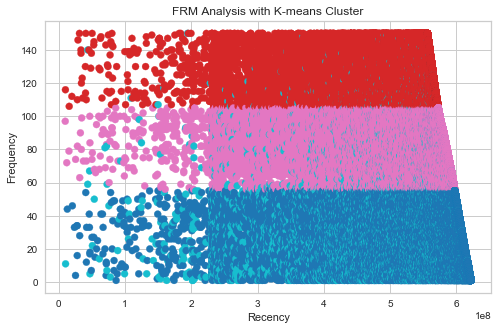

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax_full = plt.figure(figsize=(8, 5)).gca()
ax_full.scatter(
    x = RFM["user_id"],
    y = RFM["Recency"],

    c = data_pred, 
    cmap = 'tab10'
)
ax_full.set_xlabel('Recency')
ax_full.set_ylabel('Frequency')
plt.title("FRM Analysis with K-means Cluster")
plt.show()

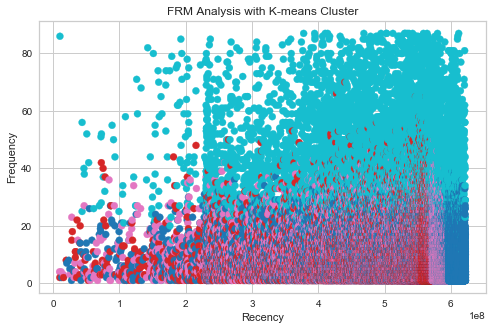

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax_full = plt.figure(figsize=(8, 5)).gca()
ax_full.scatter(
    x = RFM["user_id"],
    y = RFM["Frequency"],

    c = data_pred, 
    cmap = 'tab10'
)
ax_full.set_xlabel('Recency')
ax_full.set_ylabel('Frequency')
plt.title("FRM Analysis with K-means Cluster")
plt.show()

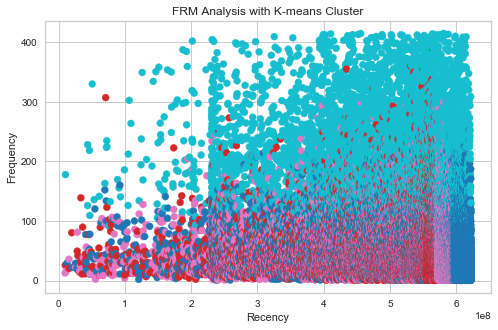

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax_full = plt.figure(figsize=(8, 5)).gca()
ax_full.scatter(
    x = RFM["user_id"],
    y = RFM["Monetary"],

    c = data_pred, 
    cmap = 'tab10'
)
ax_full.set_xlabel('Recency')
ax_full.set_ylabel('Frequency')
plt.title("FRM Analysis with K-means Cluster")
plt.show()

In [81]:
data_RFM_interp = data_RFM_scaled_final.groupby(["labels"]).agg({"Recency":"mean", "Frequency":"mean", "Monetary":"mean"})

In [82]:
data_RFM_interp["count"] = pd.DataFrame(data_RFM_scaled_final.labels.value_counts())

- (0) New Customers(High R and Low F);
- (1) At-Risk(Low R and Low F);
- (2) Potential Loyalist(Mid R and Low F); 
- (3) Loyal Customers(High F and High M).

In [83]:
data_RFM_interp

,Recency,Frequency,Monetary,count
labels,,,,
At-Risk,0.178021,0.079217,0.095272,39934
Loyal Customers,0.262868,0.480551,0.470845,8005
New Customers,0.850413,0.077010,0.093029,26205
Potential Loyalist,0.554358,0.076582,0.091976,33545


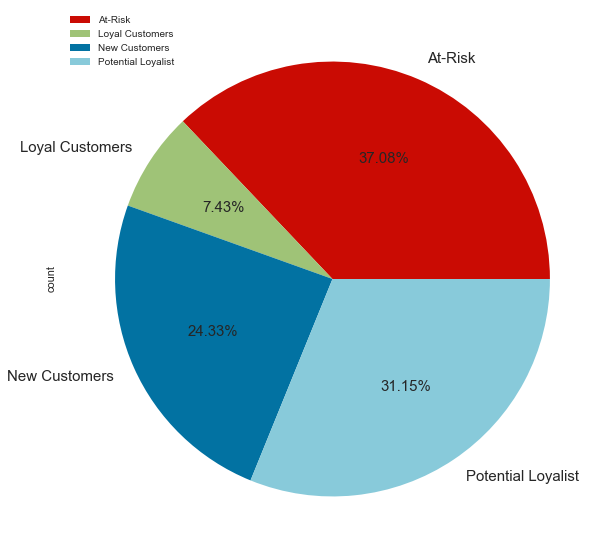

In [40]:
data_RFM_interp.plot.pie(y = "count", autopct = "%1.2f%%", colors = ["r", "g", "b", "c"], figsize = (10, 10), fontsize = 15)

In [41]:
import matplotlib
import matplotlib.pyplot as plt

In [42]:
data_RFM_final.to_csv("../data/data_RFM_scaled_label.csv")

In [49]:
norm = matplotlib.colors.Normalize(vmin=min(data_RFM_interp["count"]), vmax=max(data_RFM_interp["count"]))
colors = [matplotlib.cm.Reds(norm(value)) for value in data_RFM_interp["count"]]

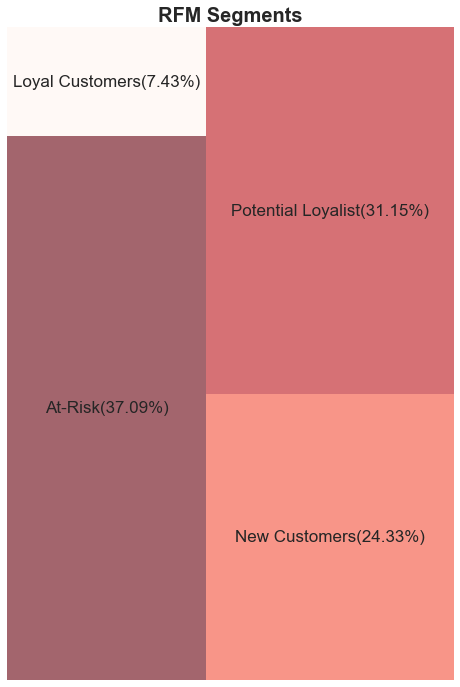

In [65]:
import squarify
fig1 = plt.gcf()
ax = fig1.add_subplot()
fig1.set_size_inches(8, 12)
squarify.plot(sizes = data_RFM_interp["count"],
             label = ["At-Risk(37.09%)", "Loyal Customers(7.43%)", "New Customers(24.33%)", "Potential Loyalist(31.15%)"],
             color = colors,
             alpha = 0.6,
             text_kwargs={'fontsize':17})
plt.title("RFM Segments", fontsize = 20, fontweight = "bold")
plt.axis("off")
plt.show()

In [66]:
fig1.savefig("../plots/User Distribution in RFM Analysis.png")

## Find sales in each cluster

In [85]:
RFM

,user_id,Recency,Frequency,Monetary,labels
0,9794320,97,4,12.68,Loyal Customers
1,10079204,116,2,25.81,New Customers
2,10280338,11,86,177.83,Potential Loyalist
3,12055855,72,4,16.54,Loyal Customers
4,12936739,44,2,29.89,At-Risk
...,...,...,...,...,...
107684,622065819,1,4,20.48,At-Risk
107685,622066161,1,4,12.95,At-Risk
107686,622067983,1,10,66.48,At-Risk
107687,622069477,1,1,0.95,At-Risk


In [86]:
#group by user_id and star_days
RFM_groupby_sales = RFM.groupby(['labels']).agg({
    'Monetary':'sum'})

In [87]:
RFM_groupby_sales

,Monetary
labels,
At-Risk,1583485.20
Loyal Customers,1284223.97
New Customers,1014665.05
Potential Loyalist,1564464.91


In [102]:
sum(RFM_groupby_sales["Monetary"])

5446839.129999993

In [103]:
RFM_groupby_sales["Precent"] = RFM_groupby_sales["Monetary"]/sum(RFM_groupby_sales["Monetary"])

In [104]:
RFM_groupby_sales

,Monetary,Precent
labels,,
At-Risk,1583485.20,0.290716
Loyal Customers,1284223.97,0.235774
New Customers,1014665.05,0.186285
Potential Loyalist,1564464.91,0.287224
